In [1]:
import numpy as np
from nelson_siegel_svensson.calibrate import calibrate_ns_ols, errorfn_ns_ols
from matplotlib import pyplot as plt

## Data

In [2]:
t = np.array([0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0])
y = np.array(
    [0.01, 0.011, 0.013, 0.016, 0.019, 0.021, 0.026, 0.03, 0.035, 0.037, 0.038, 0.04]
)

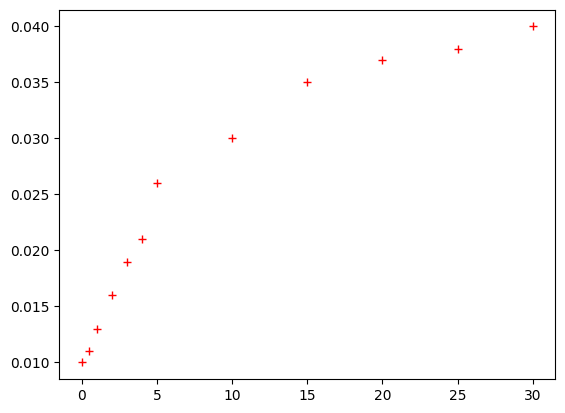

In [3]:
plt.plot(t, y, "r+");

## OLS-Based-Calibration of Nelson-Siegel

In [4]:
curve, status = calibrate_ns_ols(
    t, y, tau0=1.0
)  # starting value of 1.0 for the optimization of tau
assert status.success
curve

NelsonSiegelCurve(beta0=0.0420173934480243, beta1=-0.03182903098383833, beta2=-0.026797322696990512, tau=1.7170970849694664)

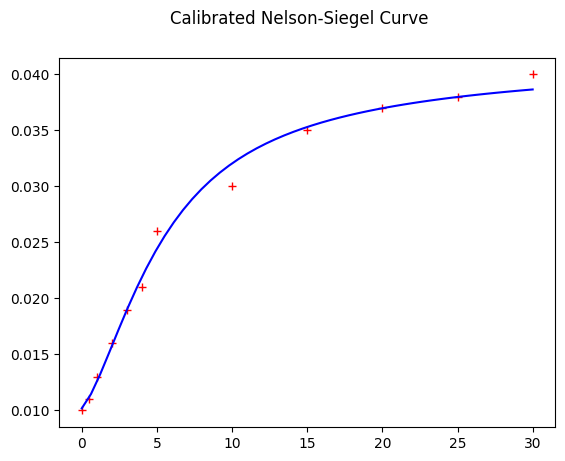

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle("Calibrated Nelson-Siegel Curve")
ax.plot(t, y, "r+")
t2 = np.linspace(0, 30)
ax.plot(t2, curve(t2), "b-");

## Error Function Given Tau for Nelson-Siegel

In [6]:
taus = np.linspace(0.5, 6, 300)
err = np.array([errorfn_ns_ols(tau, t, y) for tau in taus])

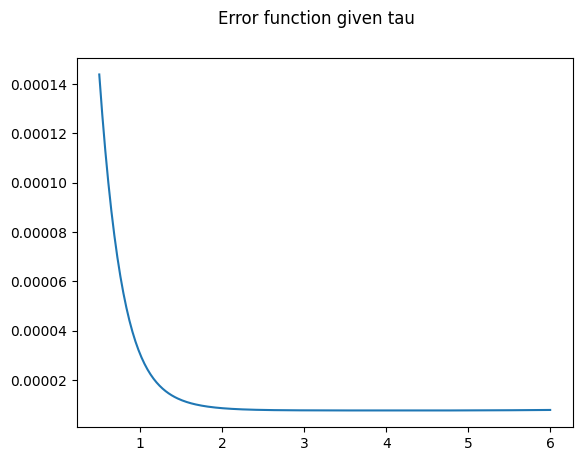

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle("Error function given tau")
ax.plot(taus, err);